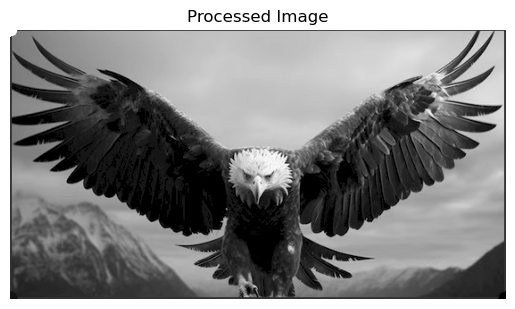

In [1]:
"""This process is useful for shape analysis and object detection in computer vision applications. 
The result is an image that highlights the contours, convex hull, and extreme points of the largest contour,
which can be used for further analysis or processing."""
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image and convert it to grayscale
img = cv2.imread(r"C:\Users\BhavyeBhasin\Downloads\SS_007.png", cv2.IMREAD_GRAYSCALE)

# Apply median blur to reduce noise
blur = cv2.medianBlur(img, 11)

# Threshold the image to create a binary mask
ret, thresh = cv2.threshold(blur, 240, 255, cv2.THRESH_BINARY_INV)

# Find contours
cnts, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate convexity defects for the largest contour
if len(cnts) > 0:
    hull2 = cv2.convexHull(cnts[0], returnPoints=False)
    defect = cv2.convexityDefects(cnts[0], hull2)
else:
    defect = None

# Determine extreme points
c_max = max(cnts, key=cv2.contourArea)
extLeft = tuple(c_max[c_max[:, :, 0].argmin()][0])
extRight = tuple(c_max[c_max[:, :, 0].argmax()][0])
extTop = tuple(c_max[c_max[:, :, 1].argmin()][0])
extBot = tuple(c_max[c_max[:, :, 1].argmax()][0])

# Draw contours, convex hull, and extreme points
for c in cnts:
    epsilon = 0.0001 * cv2.arcLength(c, True)
    data = cv2.approxPolyDP(c, epsilon, True)
    hull = cv2.convexHull(data)
    cv2.drawContours(img, [c, hull], -1, (50, 50, 150), 2)
    if defect is not None:
        for i in range(defect.shape[0]):
            s, e, f, d = defect[i, 0]
            far = tuple(c[f][0])
            cv2.circle(img, far, 5, [0, 0, 255], -1)

# Draw extreme points
cv2.circle(img, extLeft, 8, (255, 0, 255), -1)  # Pink
cv2.circle(img, extRight, 8, (0, 125, 255), -1)  # Brown
cv2.circle(img, extTop, 8, (255, 10, 0), -1)  # Blue
cv2.circle(img, extBot, 8, (19, 152, 152), -1)  # Green

# Display the result
plt.imshow(img, cmap="gray")
plt.title("Processed Image")
plt.axis("off")
plt.show()


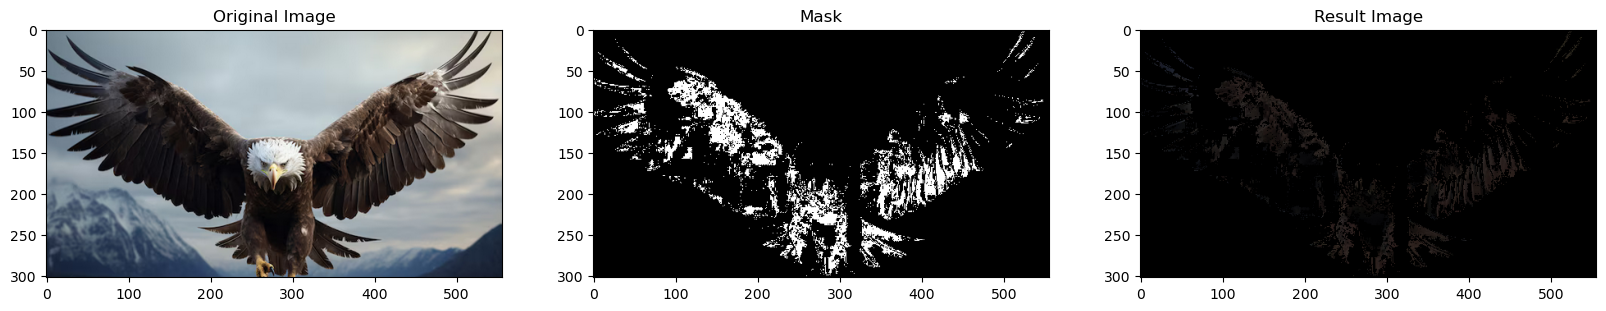

'\n an HSV image is an image represented in the HSV (Hue, Saturation, Value) color space. This is a different \n way of representing color than the traditional RGB (Red, Green, Blue) color model. Here’s what each component \n means:\n\nHue (H): This represents the color type and is expressed as a number from 0 to 360 degrees. For example, red \nfalls between 0 and 60 degrees, yellow between 61 and 120 degrees, green between 121 and 180 degrees, and so \non.\nSaturation (S): This describes the amount of gray in a particular color, from 0 to 100 percent. Reducing this \ncomponent toward zero introduces more gray and produces a faded effect12.\nValue (V): This describes the brightness or intensity of the color, from 0 to 100 percent, where 0 is completely\nblack, and 100 is the brightest and reveals the most color12.\nThe HSV color model is often used in computer vision and image processing applications such as image segmentation,\nobject detection, and color-based image retrieval3. It’s 

In [2]:
"""Object detection using hue saturation value"""
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread(r"C:\Users\BhavyeBhasin\Downloads\SS_007.png")
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_green = np.array([0, 0, 0])
upper_green = np.array([120, 99, 50])
mask = cv2.inRange(hsv_image, lower_green, upper_green)
res = cv2.bitwise_and(image, image, mask=mask)
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.title('Result Image')
plt.show()
"""
 an HSV image is an image represented in the HSV (Hue, Saturation, Value) color space. This is a different 
 way of representing color than the traditional RGB (Red, Green, Blue) color model. Here’s what each component 
 means:

Hue (H): This represents the color type and is expressed as a number from 0 to 360 degrees. For example, red 
falls between 0 and 60 degrees, yellow between 61 and 120 degrees, green between 121 and 180 degrees, and so 
on.
Saturation (S): This describes the amount of gray in a particular color, from 0 to 100 percent. Reducing this 
component toward zero introduces more gray and produces a faded effect12.
Value (V): This describes the brightness or intensity of the color, from 0 to 100 percent, where 0 is completely
black, and 100 is the brightest and reveals the most color12.
The HSV color model is often used in computer vision and image processing applications such as image segmentation,
object detection, and color-based image retrieval3. It’s a more intuitive way to represent color that aligns more
closely with how humans perceive color12. In the code you asked about, the cv2.cvtColor function is used to 
convert an image from the BGR color space to the HSV color space.

"""